In [223]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [224]:
train_features = pd.read_csv('train_features.csv')
train_target = pd.read_csv('train_salaries.csv')
test_features = pd.read_csv('test_features.csv')

jobs = pd.merge(train_features, train_target, how='inner', on='jobId') 

In [225]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [226]:
jobs.describe()

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [227]:
jobs.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684733654,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [228]:
jobs.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


## Target Variable (Salary)

### Distribution

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Salary Distribution')

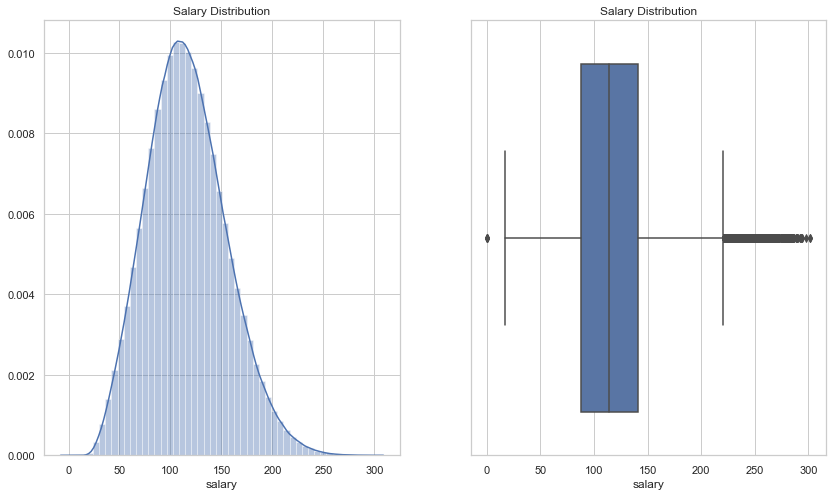

In [229]:
fig = plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.distplot(jobs['salary'])
plt.title('Salary Distribution')

plt.subplot(1,2,2)
sns.boxplot(jobs['salary'])
plt.title('Salary Distribution')

### Outliers

In [230]:
# Checking and controlling for outliers

def outliers(df, feature):
        stats = df[feature].describe()
        quartile_range = stats['75%'] - stats['25%']
        upper_bound = stats['75%'] + (1.5 * quartile_range)
        lower_bound = stats['25%'] - (1.5 * quartile_range)
        return stats, upper_bound, lower_bound

stats, upper_bound, lower_bound = outliers(jobs, 'salary')

In [231]:
# drop outliers
jobs = jobs[(jobs['salary'] >= lower_bound)]# & (jobs['salary'] <= upper_bound)]

In [232]:
jobs.shape

(999995, 9)

## Feature variables

In [233]:
#Plotting feature variables and their correlation with the target variable
def plot_feature(df, feature, target=None):
    fig = plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    
    if df[feature].dtype in ['float64', 'int64'] or feature=='companyId':
        df[feature].value_counts().sort_index().plot()
        
    else:
        jobs[feature] = jobs[feature].astype('category')
        mean = jobs.groupby(feature)['salary'].mean()
        levels = mean.sort_values().index.tolist()
        jobs[feature].cat.reorder_categories(levels, inplace=True)
        
        ax = sns.countplot(x=feature, data=df)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2, height +3.3, '{:.2%}'.format(height/len(df)), ha='center')
    
    plt.title(feature + " Distribution", fontsize=15)
    plt.xlabel(feature)
    plt.ylabel('Counts')
    if feature == 'companyId':
        plt.xticks(rotation=90)
        jobs[feature] = jobs[feature].astype('category')
    
    plt.subplot(2,1,2)
    if df[feature].dtype in ['float64', 'int64'] or feature == 'companyId':
        mean= df.groupby(feature)['salary'].mean().sort_index()
        std = df.groupby(feature)['salary'].std().sort_index()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, alpha = 0.2)
        
    
    else:
        sns.boxplot(x=feature, y=target, data=df)
    
    plt.xlabel(feature)
    plt.ylabel('Salary')
        
    plt.title(target + " by " + feature, fontsize=15)

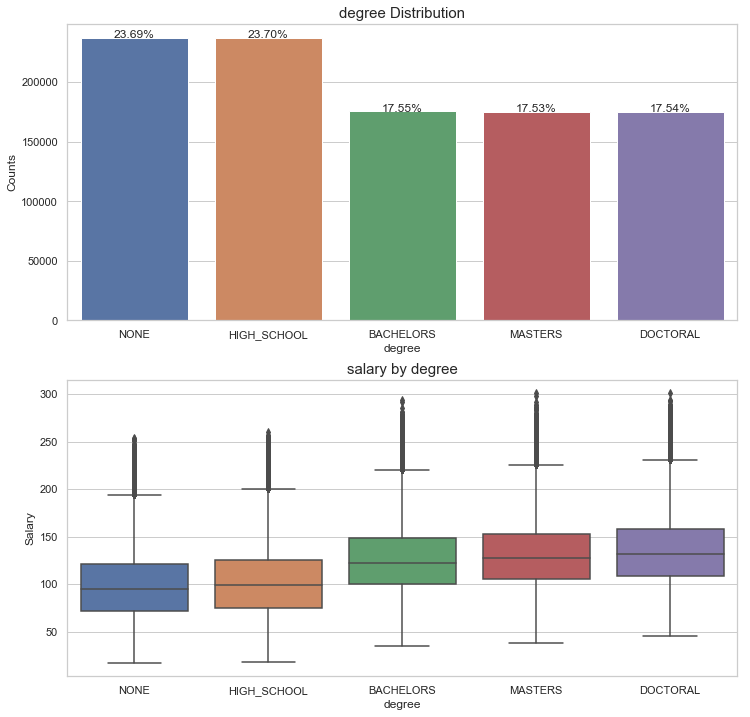

In [234]:
plot_feature(jobs, 'degree', 'salary')

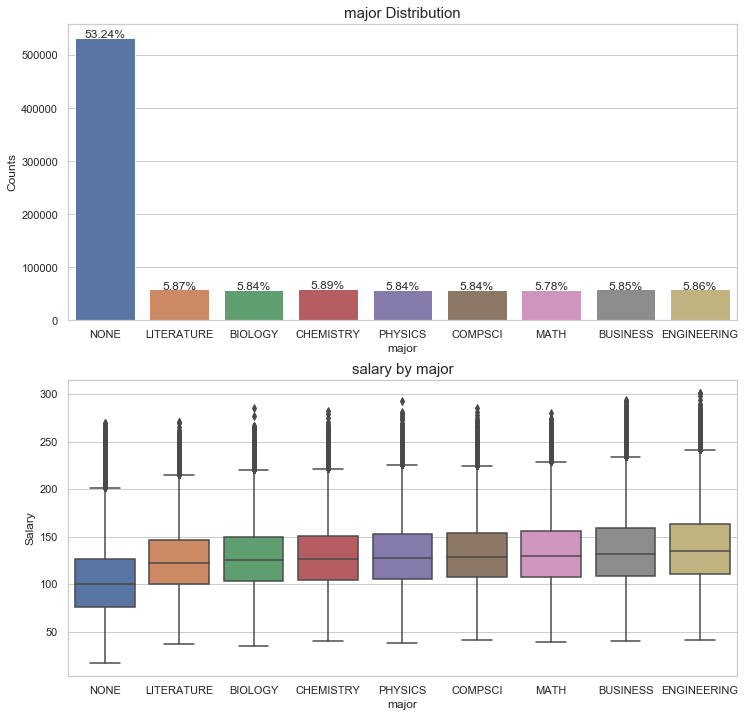

In [235]:
plot_feature(jobs, 'major', 'salary')

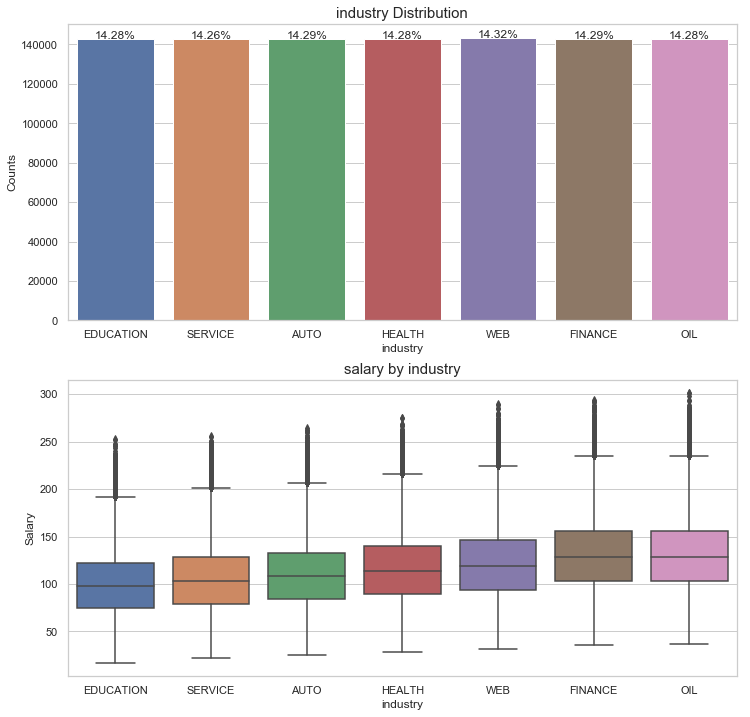

In [236]:
plot_feature(jobs, 'industry', 'salary')

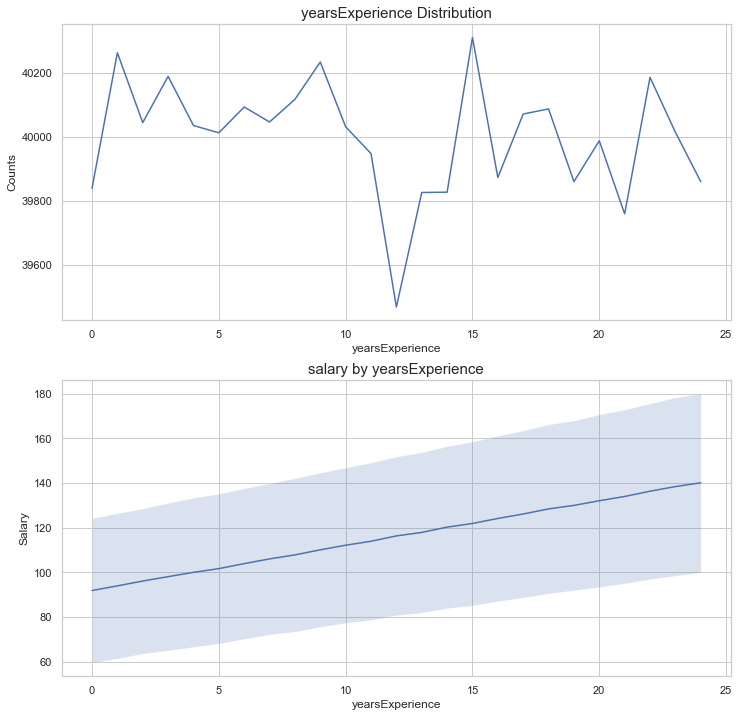

In [237]:
plot_feature(jobs, 'yearsExperience', 'salary')

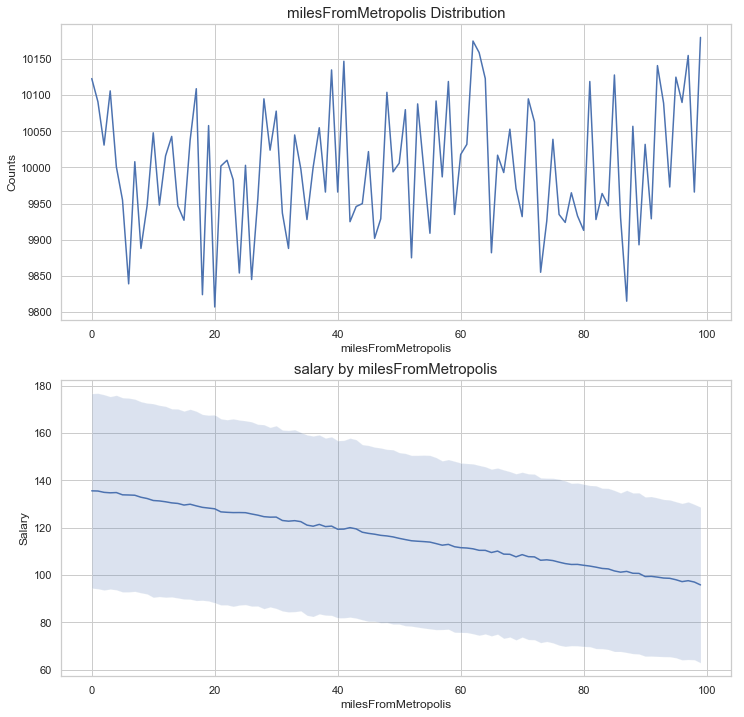

In [238]:
plot_feature(jobs, 'milesFromMetropolis', 'salary')

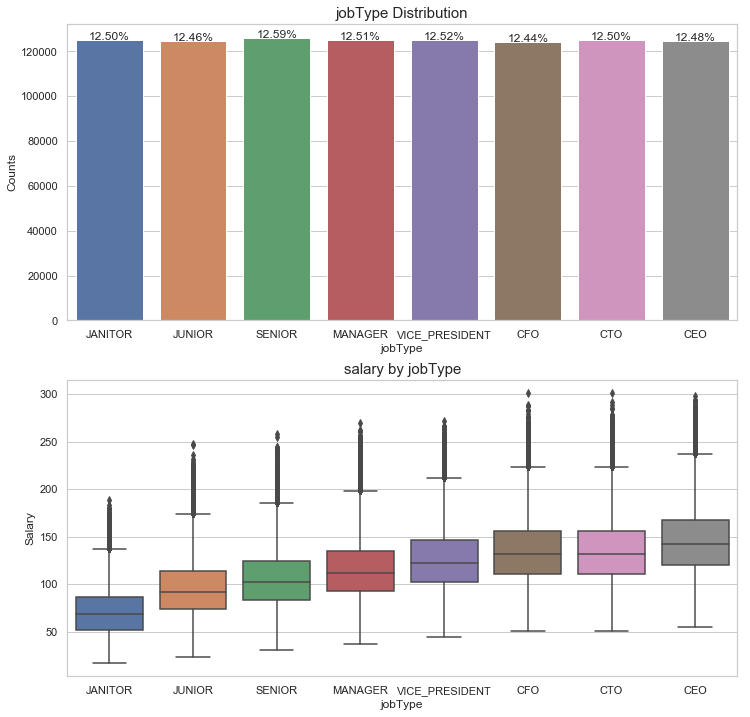

In [239]:
plot_feature(jobs, 'jobType', 'salary')

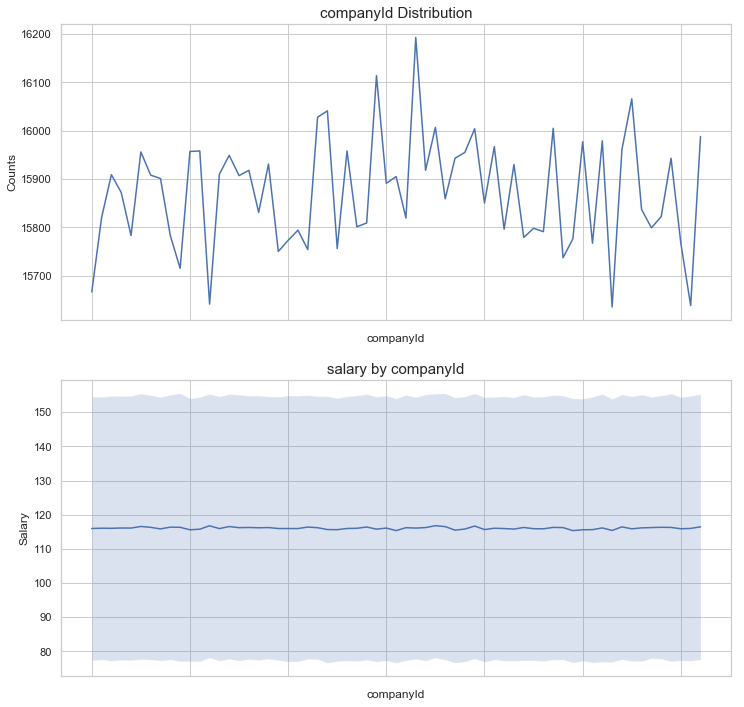

In [240]:
plot_feature(jobs, 'companyId', 'salary')